In [5]:
import tarfile
import matplotlib.pyplot as plt
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.util.selection import Selection
from dysh.spectra.core import average
import numpy as np
import pandas as pd
from scipy.stats import median_abs_deviation

In [6]:
# check dysh version
from dysh import __version__
print(f"dysh version: {__version__}")

dysh version: 0.4.2


In [7]:
path_to_raw_vegas = f"/home/sdfits/AGBT24B_251_02/AGBT24B_251_02.raw.vegas/" 
sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.


In [8]:
sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,97.59854,21.908178
1,7,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,99.79335,21.73278
2,8,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,99.39169,23.975813
3,9,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,100.781647,23.593848
4,10,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,101.231538,26.036336
5,11,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,102.421806,25.077636
6,12,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,103.146221,28.109582
7,13,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,104.875261,27.198765
8,14,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,105.11463,30.160391
9,15,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,106.438223,28.726869


In [9]:
BC22_scans = [6, 8, 10, 12, 14, 16]

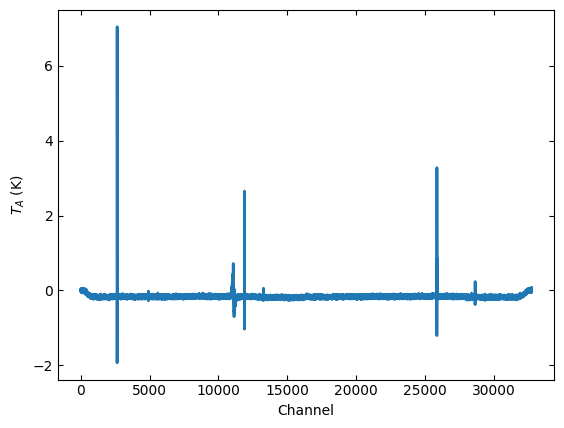

In [10]:
ps_scanblock0 = sdfits.getps(scan=BC22_scans, plnum=0)
ps0 = ps_scanblock0.timeaverage()
ps0.plot(xaxis_unit="chan")

In [ ]:
# Initialize lists and arrays to store flag channels, median flux, and MAD flux values
flag_list = []
median_flux_array = np.array([])
MAD_flux_array = np.array([])

# Iterate over each scan in BC22_scans
for scans in BC22_scans:
    # Load the spectra for the current scan
    Single_spectra1 = sdfits.getps(scan=scans, plnum=0)
    Single_spectra = Single_spectra1.timeaverage()
    flux_values = Single_spectra.flux.value  # Access flux values once

    # Calculate median flux and MAD flux for the current spectra
    median_flux = np.median(flux_values)
    median_flux_array = np.append(median_flux_array, median_flux)
    MAD_flux = median_abs_deviation(flux_values)
    MAD_flux_array = np.append(MAD_flux_array, MAD_flux)

    # Create a flag mask for values outside the median ± 5 * MAD range
    flag_mask = np.logical_or(flux_values < median_flux - 5 * MAD_flux,
                              flux_values > median_flux + 5 * MAD_flux)
    flag_chan = np.where(flag_mask)[0]

    # Define bounds and band for flagging
    lower_bound = 800
    upper_bound = 31000
    band = 5
    offsets = np.arange(-band, band + 1)

    # Filter valid flags within the bounds and create new_flag_chan using NumPy operations
    valid_flags = flag_chan[(flag_chan > lower_bound) & (flag_chan < upper_bound)]
    new_flag_chan = np.unique(np.concatenate([valid_flags + offset for offset in offsets] + 
                                             [np.array([i for i in range(0, lower_bound)])] + 
                                             [np.array([i for i in range(upper_bound, len(flux_values))])]))
    new_flag_chan = [int(i) for i in new_flag_chan if i >= 0 and i < len(flux_values)]
    print(f"{scans} number, flags:", new_flag_chan)

    # Flag the channels in the current scan
    sdfits.flag(scan=scans, channel=new_flag_chan, plnum=0)

    # Check if scans+1 is within a valid range before flagging
    if scans + 1 <= max(BC22_scans):
        sdfits.flag(scan=scans + 1, channel=new_flag_chan, plnum=0)

    # Append the new_flag_chan to the flag_list
    flag_list.append(new_flag_chan)

6 number, flags: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

flag_list = []
median_flux_array = np.array([])
MAD_flux_array = np.array([])
for scans in BC22_scans:
    Single_spectra1 = sdfits.getps(scan = scans, plnum=0)
    Single_spectra = Single_spectra1.timeaverage()
    median_flux = np.median(Single_spectra.flux).value
    median_flux_array = np.append(median_flux_array, median_flux)
    MAD_flux = median_abs_deviation(Single_spectra.flux.value)
    MAD_flux_array = np.append(MAD_flux_array, MAD_flux)
    flag_mask = np.zeros(Single_spectra.shape)
    flag_mask[np.logical_or(Single_spectra.flux.value < median_flux - 5*MAD_flux, Single_spectra.flux.value > median_flux + 5*MAD_flux)] = 1
    flag_mask = flag_mask.flatten()
    flag_chan = np.where(flag_mask==1)[0].tolist()

    # make a new flag_chan list which for ever value in flag_chan, add a value of the previous and next value
    new_flag_chan = []
    for flag in flag_chan:
        if flag > 0 and flag < len(Single_spectra.flux.value)-1:
            new_flag_chan.append(flag-1)
            new_flag_chan.append(flag)
            new_flag_chan.append(flag+1)
        elif flag == 0:
            new_flag_chan.append(flag)
            new_flag_chan.append(flag+1)
        elif flag == len(Single_spectra.flux.value)-1:
            new_flag_chan.append(flag-1)
            new_flag_chan.append(flag)
    # drop the repeated values
    new_flag_chan = list(set(new_flag_chan))
    new_flag_chan.sort()
    # drop the repeated values
    print(f"{scans} number, flags:", new_flag_chan)
    sdfits.flag(scan = scans, channel=new_flag_chan, plnum=0)
    sdfits.flag(scan = scans+1, channel=new_flag_chan, plnum=0)
    # if flag_chan not in flag_list, then append to flag_list
    flag_list.append(new_flag_chan)

In [13]:
sdfits.flags.show()

 ID    TAG    SCAN PLNUM               CHAN               # SELECTED
--- --------- ---- ----- -------------------------------- ----------
  0 3ef8191d7    6     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  1 93f2804af    7     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
 10 15aad2c3d   16     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  2 b2157d9d1    8     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  3 47956ed04    9     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  4 17262920d   10     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  5 d9525a770   11     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  6 904acab78   12     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  7 448e00cd4   13     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  8 f2156941f   14     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  9 0606b2960   15     0 [0,1,2,3,4,5,6,...5,32766,32767]        122


In [8]:
flag_list_int = [int(x) for x in flag_list]

(-0.5, 0.3)

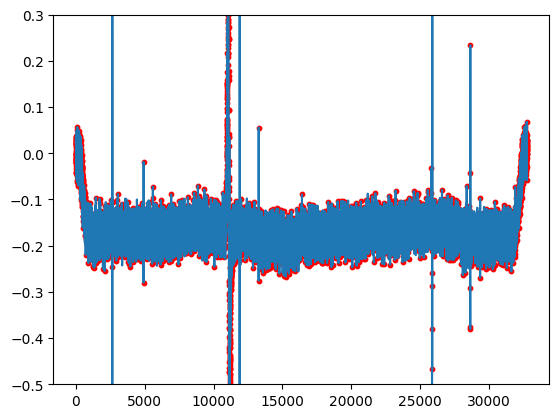

In [9]:
plt.plot(ps0.flux.value)
plt.scatter(flag_list_int, ps0.flux.value[flag_list_int], color='r', s=10)
plt.ylim(-0.5, 0.3)

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


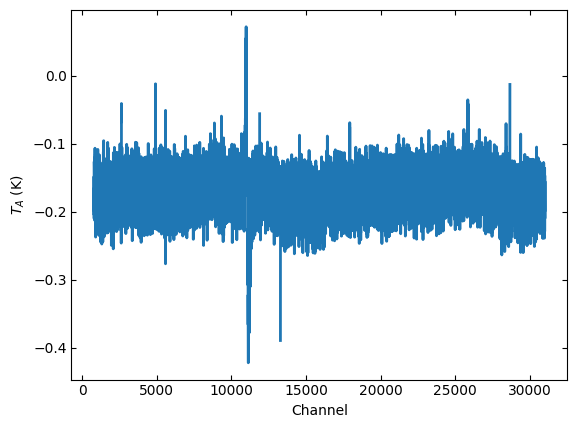

In [14]:
new_ps_scanblock = sdfits.getps(scan=BC22_scans, plnum=0)
new_ps = new_ps_scanblock.timeaverage()
new_ps.plot(xaxis_unit="chan")

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


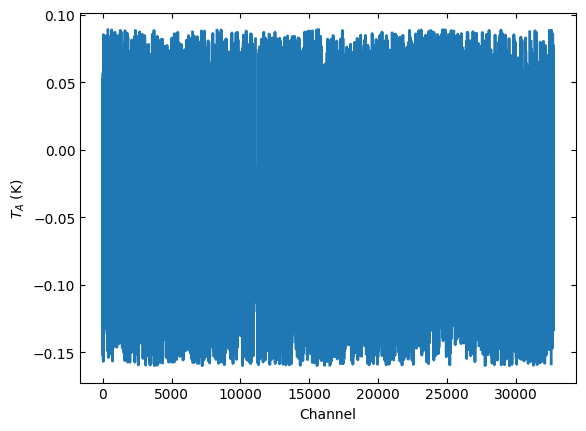

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


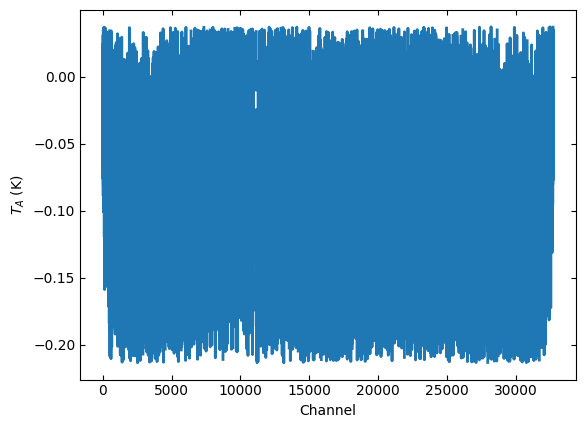

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


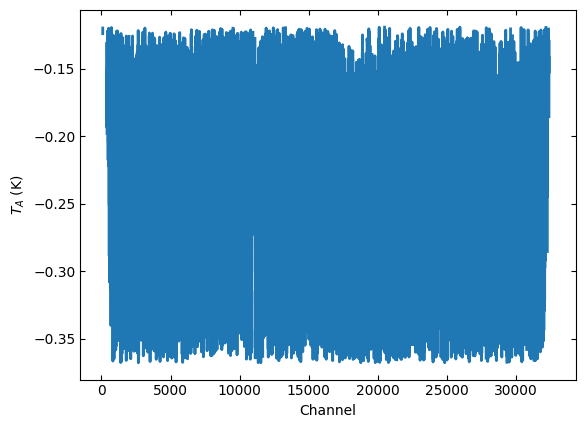

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


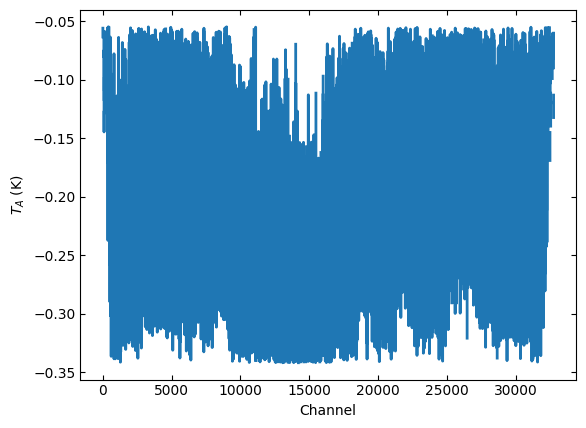

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


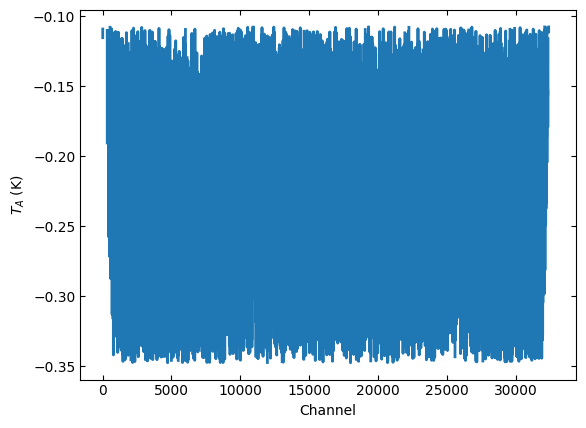

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


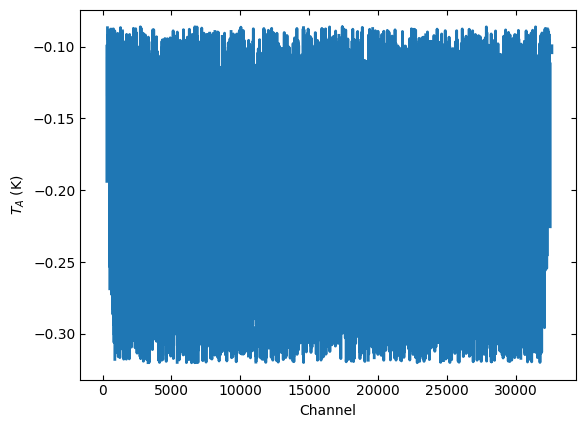

In [ ]:
for scan in BC22_scans:
    ps_scanblock = sdfits.getps(scan=scan, plnum=0)
    ps = ps_scanblock.timeaverage()
    ps.plot(xaxis_unit="chan")
    

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specif

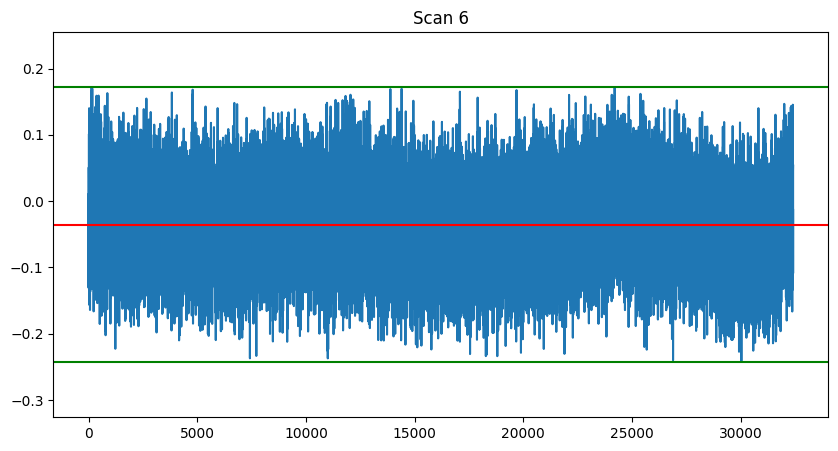

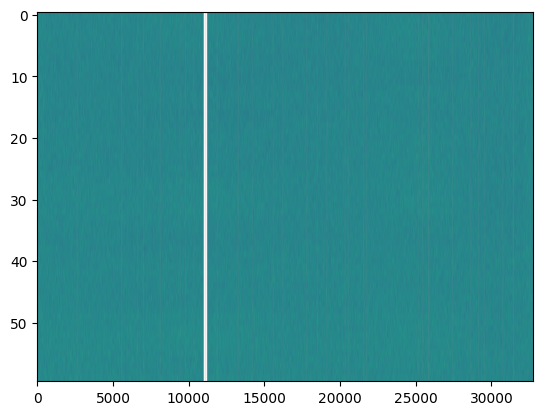

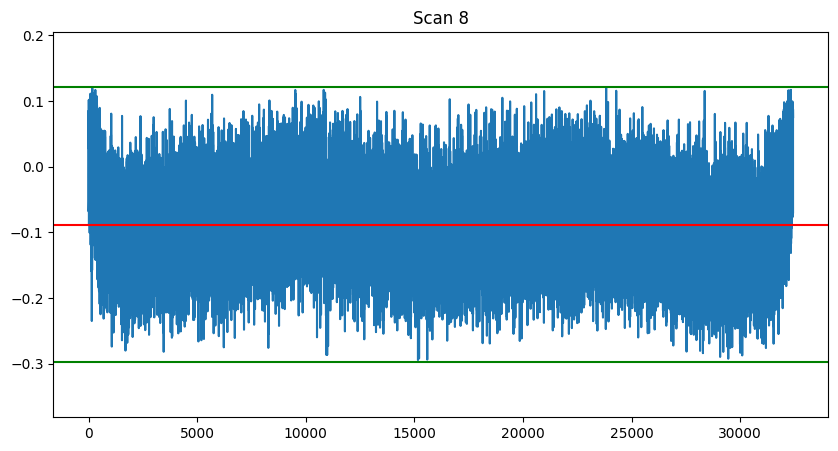

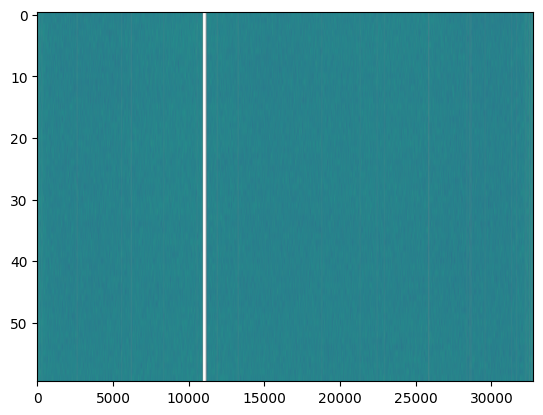

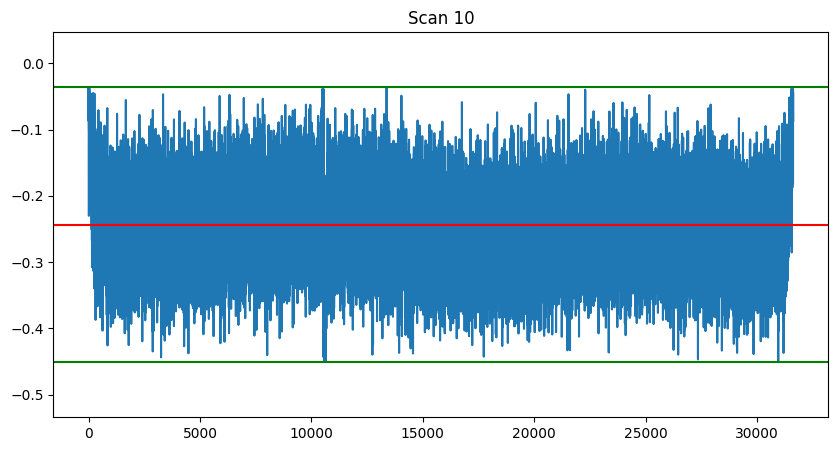

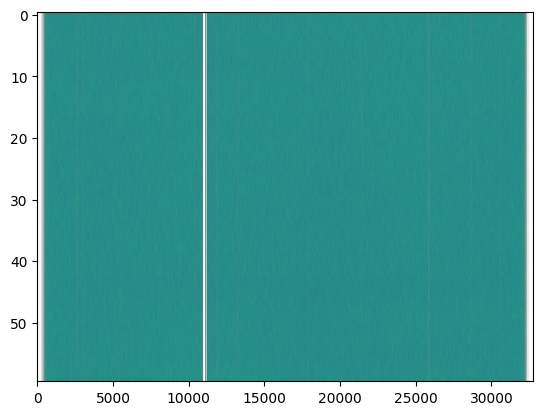

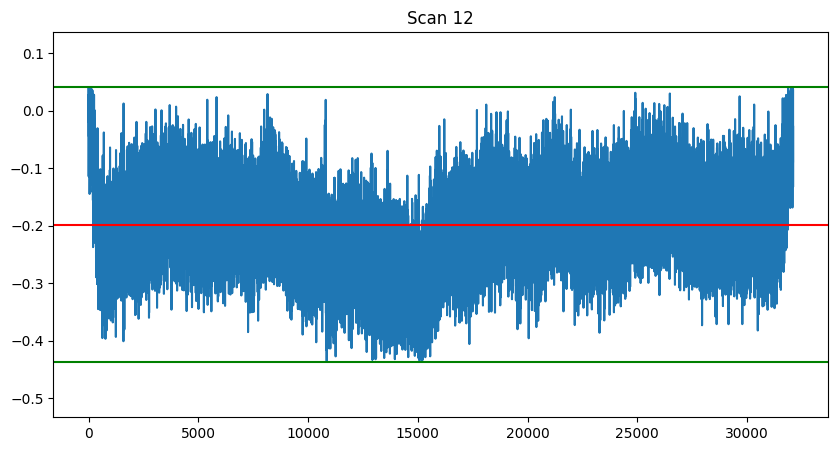

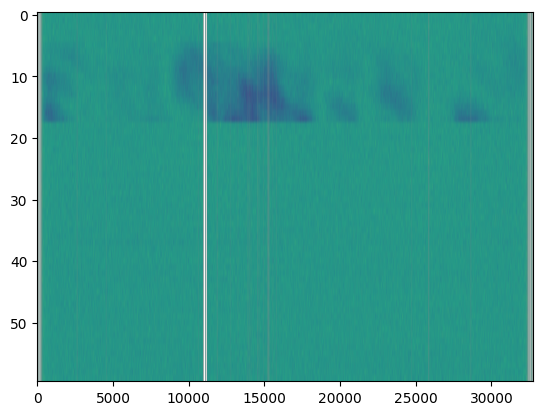

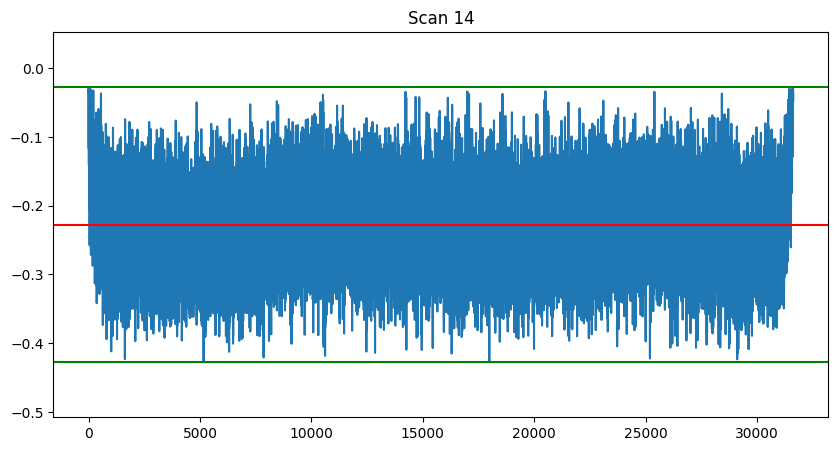

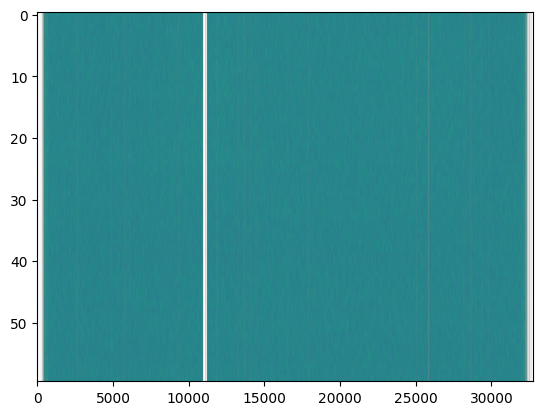

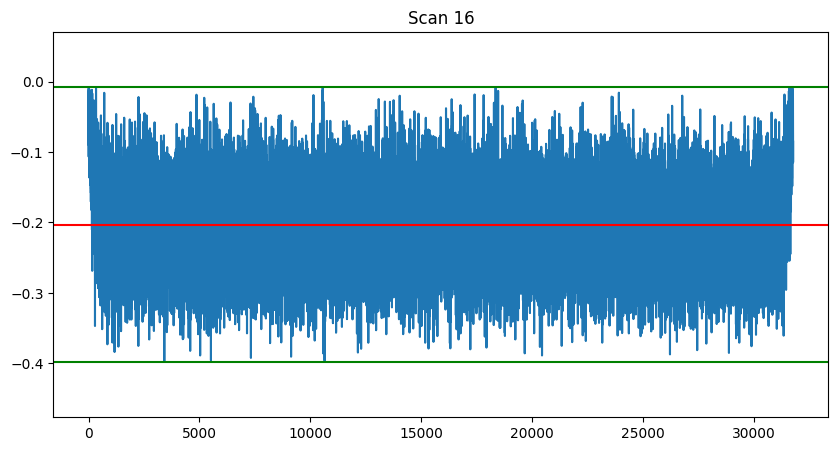

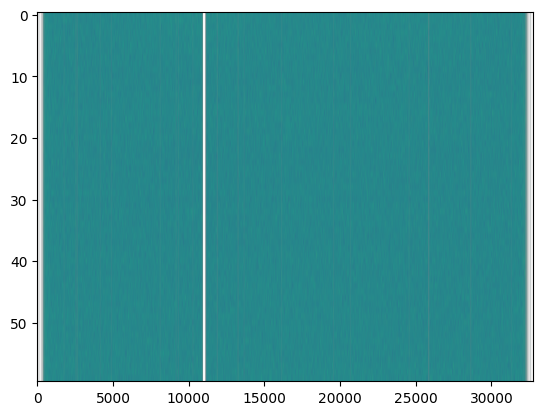

In [69]:
for i, scans in enumerate(BC22_scans):
    ps_scanblock1 = sdfits.getps(scan=scans, plnum=0)
    ps1 = ps_scanblock1.timeaverage()
    fig,ax = plt.subplots(figsize=(10,5))
    inx = range(0, len(ps1.flux.value))
    inx = list(set(inx) - set(flag_list[i]))
    ax.plot(ps1.flux.value[inx])
    ax.axhline(median_flux_array[i], color='r')
    ax.axhline(median_flux_array[i] - 5*MAD_flux_array[i], color='g')
    ax.axhline(median_flux_array[i]+ 5*MAD_flux_array[i], color='g')
    ax.set_title(f"Scan {scans}")
    ax.set_ylim(median_flux_array[i] - 7*MAD_flux_array[i], median_flux_array[i]+ 7*MAD_flux_array[i])
    plt.figure()
    plt.imshow(ps_scanblock1[0]._calibrated, aspect='auto')

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


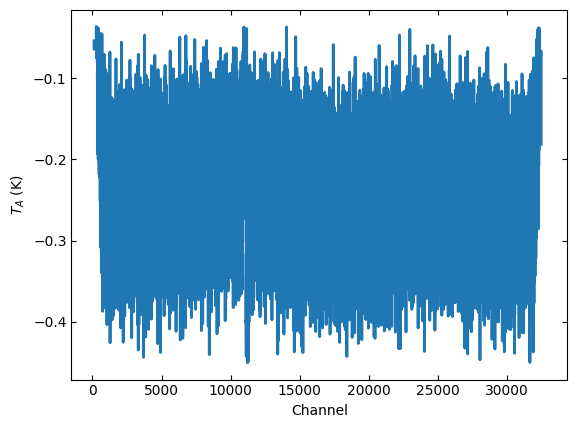

sa [0. 0. 0. ... 0. 0. 0.]


(-0.6583765409303534, 0.17113322938323008)

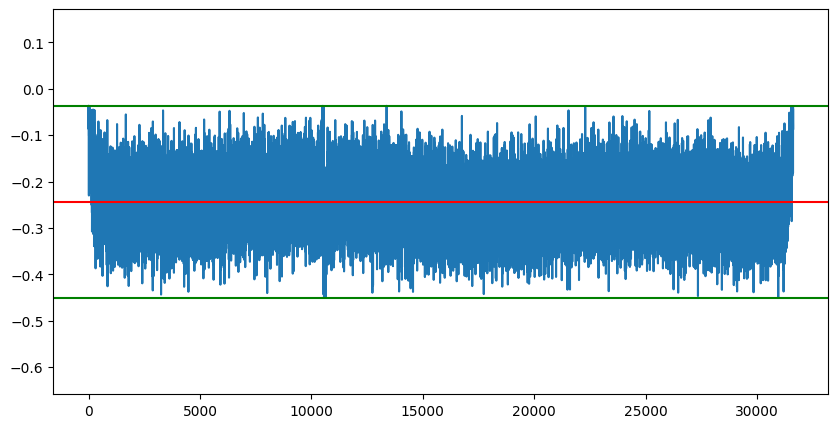

In [61]:
scan_10 = sdfits.getps(scan=10, plnum=0, apply_flags= True)
scan_10s = scan_10.timeaverage()
scan_10s.plot(xaxis_unit="chan")
fig,ax = plt.subplots(figsize=(10,5))
print("sa", scan_10s.flux.value)
inx = range(0, len(ps1.flux.value))
inx = list(set(inx) - set(flag_list[2]))
ax.plot(scan_10s.flux.value[inx])
ax.axhline(median_flux_array[2], color='r')
ax.axhline(median_flux_array[2] - 5*MAD_flux_array[2], color='g')
ax.axhline(median_flux_array[2]+ 5*MAD_flux_array[2], color='g')
ax.set_ylim(median_flux_array[2] - 10*MAD_flux_array[2], median_flux_array[2]+ 10*MAD_flux_array[2])

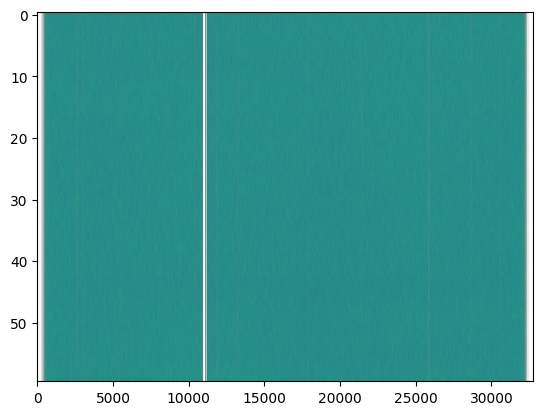

In [62]:
plt.figure()
plt.imshow(scan_10[0]._calibrated, aspect='auto')

In [16]:
scan_10s

<Spectrum1D(flux=[0.0 ... 0.0] K (shape=(32768,), mean=-0.23780 K); spectral_axis=<SpectralAxis 
   (observer: <ITRS Coordinate (obstime=2024-11-16T09:47:37.630, location=(0.0, 0.0, 0.0) km): (x, y, z) in m
                  (882593.9465029, -4924896.36541728, 3943748.74743984)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <SkyCoord (FK5: equinox=J2000.000): (ra, dec, distance) in (deg, deg, kpc)
                (186.19575568, 7.91654593, 1000000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (-2.92751277e-21, 0., 801.)>
    observer to target (computed from above):
      radial_velocity=777.1839932428185 km / s
      redshift=0.002595775769687503
    doppler_rest=1420405751.77 Hz
    doppler_convention=optical)
  [1.42851308e+09 1.42851237e+09 1.42851165e+09 ... 1.40507773e+09
 1.40507701e+09 1.40507630e+09] Hz> (length=32768))>

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


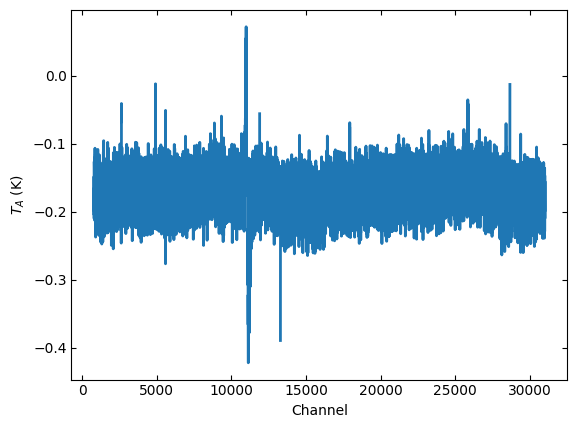

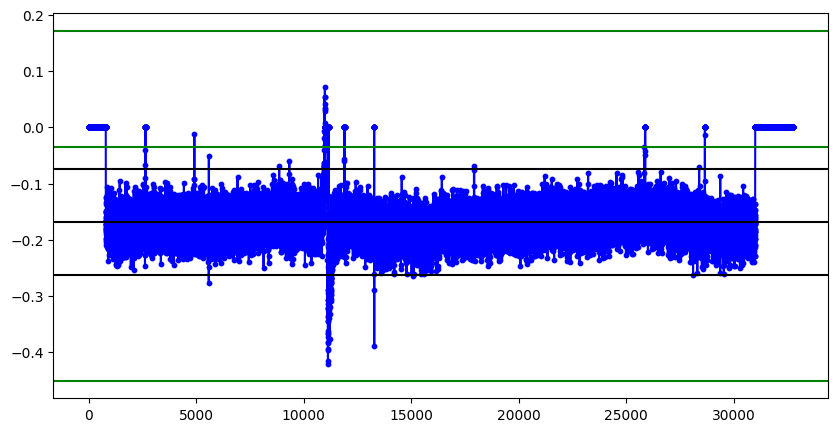

In [15]:
ps_scanblock = sdfits.getps(scan=BC22_scans, plnum=0, apply_flags=True)
ps = ps_scanblock.timeaverage()
ps.plot(xaxis_unit="chan")
fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(range(0, len(ps.flux.value)),ps.flux.value, color='b', s=10)
ax.plot(ps.flux.value, color='b')

ax.axhline(np.median(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value) - 5*median_abs_deviation(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value)+ 5*median_abs_deviation(ps.flux.value), color='k')


ax.axhline(max(median_flux_array), color='g')
ax.axhline(min(median_flux_array - 5*MAD_flux_array), color='g')
ax.axhline(max(median_flux_array+ 5*MAD_flux_array), color='g')

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


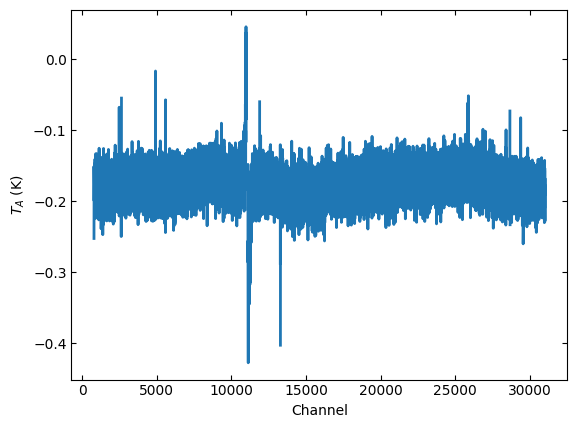

In [ ]:
ps_scanblock_smooth = sdfits.getps(scan=BC22_scans, plnum=0, apply_flags=True, smoothref=5)
ps_smooth = ps_scanblock_smooth.timeaverage()
ps_smooth.plot(xaxis_unit="chan")

In [16]:
smoothing = 5/(ps.velocity[3]-ps.velocity[2]).value

Adjusting decimation factor to be a natural number. Will decimate by 33


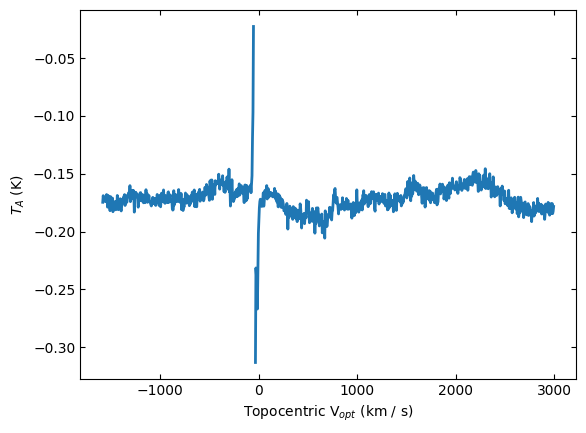

In [17]:
new_ps_smooth = ps.smooth('boxcar', smoothing)
new_ps_smooth.plot(xaxis_unit="km/s")

In [14]:
ref_sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


(-0.5, 0.3)

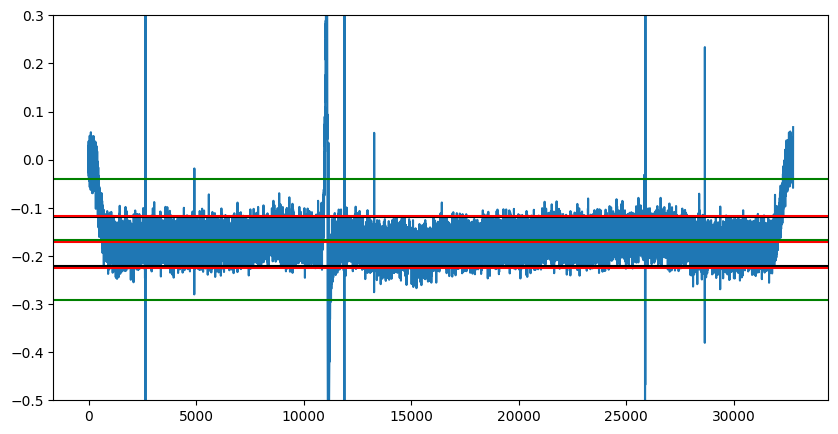

In [17]:
ref_ps_scanblock = ref_sdfits.getps(scan=BC22_scans, plnum=0)
ref_ps = ref_ps_scanblock.timeaverage()
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(ref_ps.flux.value)
ax.axhline(np.median(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value) - 3*median_abs_deviation(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value)+ 3*median_abs_deviation(ps.flux.value), color='k')

ax.axhline(np.median(ref_ps.flux.value), color='r')
ax.axhline(np.median(ref_ps.flux.value) - 3*median_abs_deviation(ref_ps.flux.value), color='r')
ax.axhline(np.median(ref_ps.flux.value)+ 3*median_abs_deviation(ref_ps.flux.value), color='r')

ax.axhline(np.mean(median_flux_array), color='g')
ax.axhline(np.mean(median_flux_array - 3*MAD_flux_array), color='g')
ax.axhline(np.mean(median_flux_array+ 3*MAD_flux_array), color='g')

ax.set_ylim(-0.5, 0.3)

In [98]:
ax.set_ylim(-0.5, 0.3)
plt.show()